In [9]:
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn import datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut,cross_val_predict

In [10]:
train_data = pd.read_csv('../archive (7)/emnist-bymerge-train2.csv', header=None)
test_data = pd.read_csv('../archive (7)/emnist-bymerge-test.csv', header=None)
l = train_data[0].head(2000)
d = train_data.drop(0, axis=1).head(2000)
lt = test_data[0]
dt = test_data.drop(0, axis=1)

In [11]:
print(d.shape)
print(l.shape)
print(dt.shape)
print(lt.shape)

class_namess = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
               'a','b','d','e','f','g','h','n','q','r','t']

(2000, 784)
(2000,)
(116323, 784)
(116323,)


In [12]:
hog_features_train = []
for image in d.values:
    fd,_ = hog(image.reshape(28, 28), orientations=9, pixels_per_cell=(7, 7), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    hog_features_train.append(fd)

hog_features_train = np.array(hog_features_train)

hog_features_test = []
for image in dt.values:
    fd,_ = hog(image.reshape(28, 28), orientations=9, pixels_per_cell=(7, 7), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    hog_features_test.append(fd)

hog_features_test = np.array(hog_features_test)

In [13]:
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train)
hog_features_test_scaled = scaler.transform(hog_features_test)

In [14]:
lb = LabelBinarizer()
lb.fit(l)
y_train = l.values
y_test = lt.values

In [15]:
clf_svm = make_pipeline(StandardScaler(), SVC(kernel='linear'))


In [16]:
loo = LeaveOneOut()
y_pred = cross_val_predict(clf_svm, hog_features_train_scaled, y_train, cv=loo)

In [17]:
loo_pred = np.array(y_pred)

In [18]:
loo_pred

array([ 0, 39,  5, ..., 38,  7,  7])

In [19]:
conf_mat_svm = confusion_matrix(y_train, loo_pred)
print('LOOCV Confusion Matrix:\n', conf_mat_svm)


LOOCV Confusion Matrix:
 [[ 55   0   0 ...   0   0   0]
 [  0  72   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   1]
 [  0   0   0 ...   0  23   2]
 [  0   0   0 ...   0   1  34]]


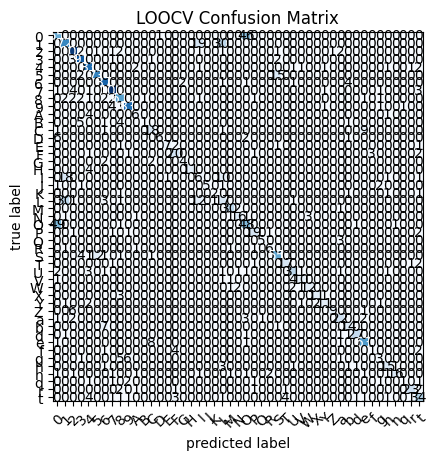

In [20]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_svm, class_names=class_namess)
plt.title('LOOCV Confusion Matrix')
plt.show()


<Axes: >

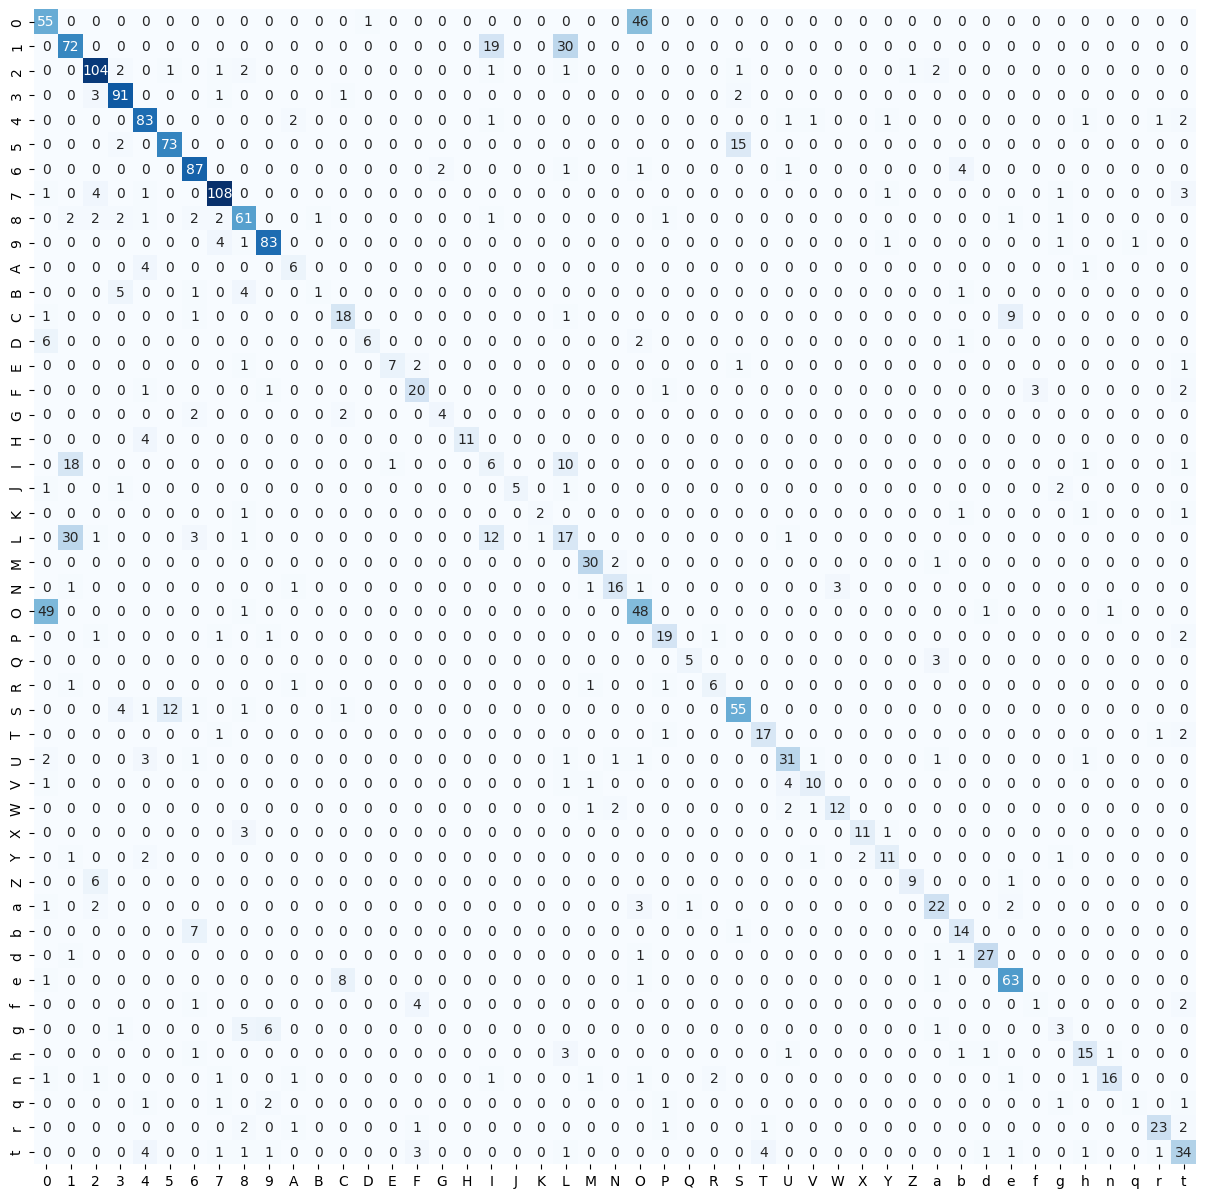

In [21]:
import seaborn as sn


df_cm = pd.DataFrame(conf_mat_svm, index = [i for i in class_namess],
                  columns = [i for i in class_namess])
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [22]:
precision_svm = precision_score(y_train, loo_pred, average=None)
recall_svm = recall_score(y_train, loo_pred, average=None)
accuracy_svm = accuracy_score(y_train, loo_pred)
f1_svm = f1_score(y_train, loo_pred, average='macro')

In [23]:
precision_svm

array([0.46218487, 0.57142857, 0.83870968, 0.84259259, 0.79047619,
       0.84883721, 0.81308411, 0.89256198, 0.72619048, 0.88297872,
       0.5       , 0.5       , 0.6       , 0.85714286, 0.875     ,
       0.66666667, 0.66666667, 1.        , 0.14634146, 1.        ,
       0.66666667, 0.25373134, 0.85714286, 0.76190476, 0.45714286,
       0.76      , 0.83333333, 0.66666667, 0.73333333, 0.77272727,
       0.75609756, 0.71428571, 0.8       , 0.84615385, 0.73333333,
       0.9       , 0.6875    , 0.60869565, 0.9       , 0.80769231,
       0.25      , 0.3       , 0.68181818, 0.88888889, 0.5       ,
       0.88461538, 0.64150943])

In [24]:
recall_svm

array([0.53921569, 0.59504132, 0.89655172, 0.92857143, 0.89247312,
       0.81111111, 0.90625   , 0.90756303, 0.79220779, 0.91208791,
       0.54545455, 0.08333333, 0.6       , 0.4       , 0.58333333,
       0.71428571, 0.5       , 0.73333333, 0.16216216, 0.5       ,
       0.33333333, 0.25757576, 0.90909091, 0.69565217, 0.48      ,
       0.76      , 0.625     , 0.6       , 0.73333333, 0.77272727,
       0.72093023, 0.58823529, 0.66666667, 0.73333333, 0.61111111,
       0.5625    , 0.70967742, 0.63636364, 0.87096774, 0.85135135,
       0.125     , 0.1875    , 0.65217391, 0.59259259, 0.125     ,
       0.74193548, 0.64150943])

In [25]:
accuracy_svm

0.7095

In [26]:
f1_svm = float(f1_svm)

In [27]:
f1_svm

0.6479264654775687

In [28]:
clf_svm.fit(hog_features_train_scaled, y_train)

y_pred_svm = clf_svm.predict(hog_features_test_scaled)
x_pred_svm = clf_svm.predict(hog_features_train_scaled)
print("")
print("")
print(y_train)
print("")
print(x_pred_svm)




[24 36  5 ... 38  7  7]

[24 36  5 ... 38  7  7]


In [29]:
conf_mat_svm = confusion_matrix(y_test, y_pred_svm)
print('SVM Confusion Matrix:\n', conf_mat_svm)

SVM Confusion Matrix:
 [[3221    8    3 ...    0    0    4]
 [   4 4219   20 ...    1    4    5]
 [   5    1 5101 ...    2    0    8]
 ...
 [   4    1   11 ...   37    2    4]
 [   1    7    2 ...    0 1805   65]
 [   4    5   24 ...    0   28 2103]]


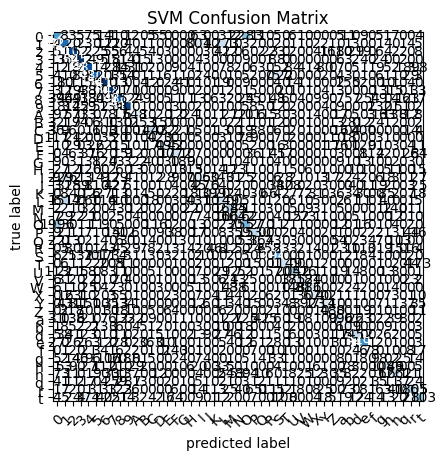

In [30]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_svm, class_names=class_namess)
plt.title('SVM Confusion Matrix')
plt.show()


<Axes: >

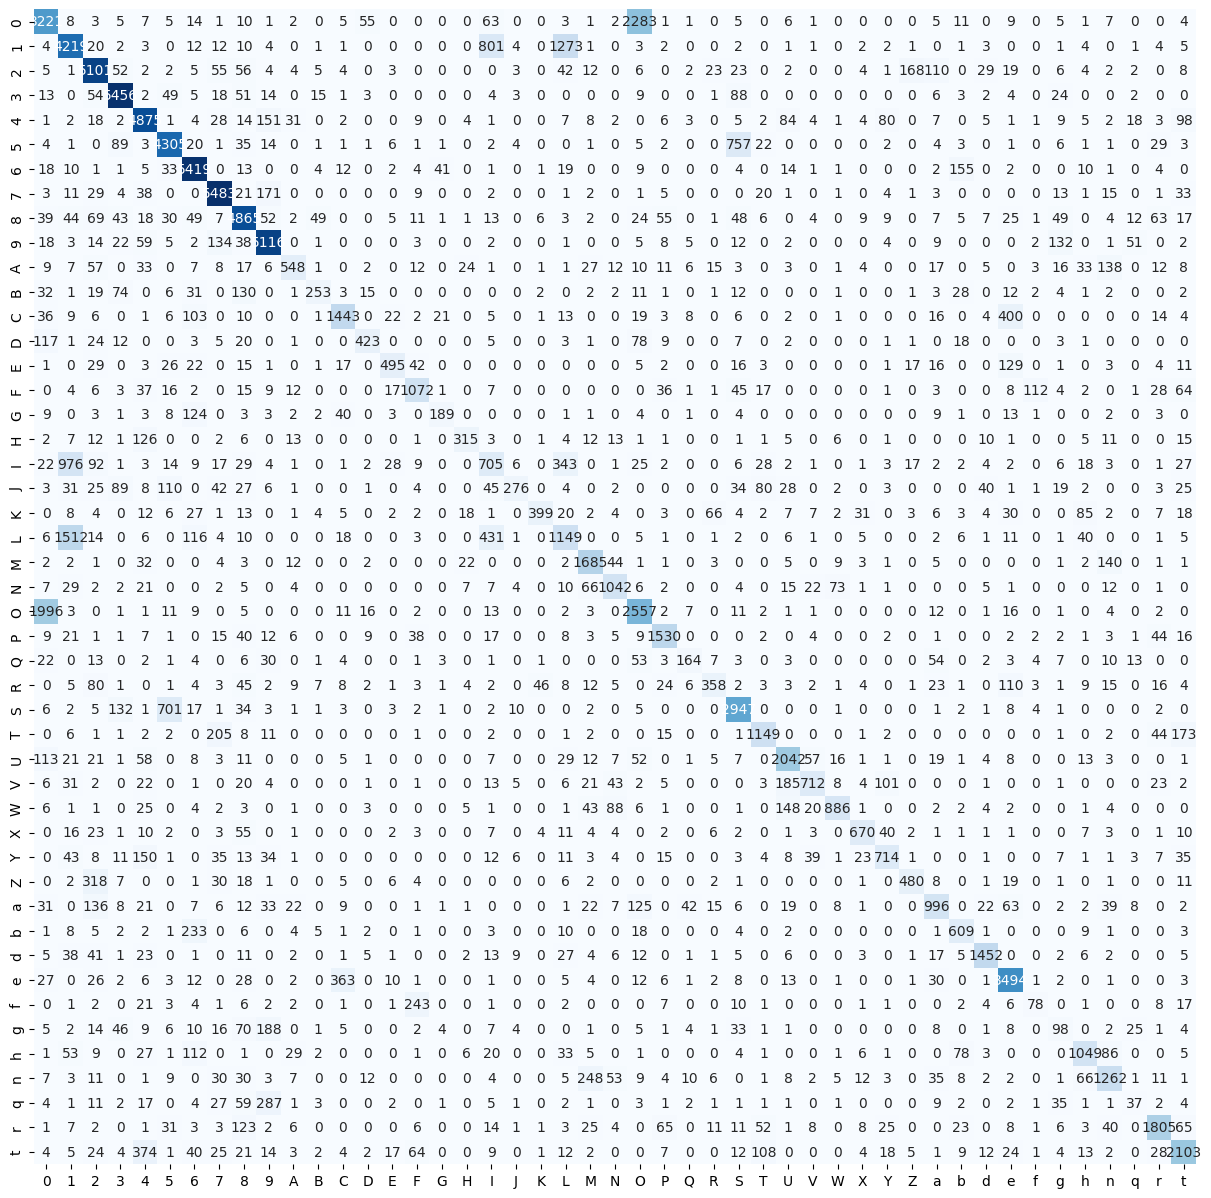

In [31]:
df_cm = pd.DataFrame(conf_mat_svm, index = [i for i in class_namess],
                  columns = [i for i in class_namess])
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [32]:
precision_svm = precision_score(y_test, y_pred_svm, average=None)
recall_svm = recall_score(y_test, y_pred_svm, average=None)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')



In [33]:
precision_svm

array([0.55381706, 0.58965758, 0.80242253, 0.89736842, 0.80220504,
       0.79766537, 0.84041563, 0.8802376 , 0.80533024, 0.8275639 ,
       0.74863388, 0.70277778, 0.73137354, 0.75942549, 0.79073482,
       0.68806162, 0.71320755, 0.77017115, 0.31291611, 0.8189911 ,
       0.85991379, 0.37280986, 0.75156111, 0.77185185, 0.47536717,
       0.8319739 , 0.61886792, 0.67931689, 0.70841346, 0.76143141,
       0.77731252, 0.8       , 0.86270691, 0.83333333, 0.69863014,
       0.68571429, 0.68689655, 0.62206333, 0.88916105, 0.78605174,
       0.35779817, 0.20762712, 0.75089477, 0.69037199, 0.21142857,
       0.83064887, 0.74733475])

In [34]:
recall_svm

array([0.56066144, 0.65921875, 0.8848222 , 0.93633087, 0.88668607,
       0.80829891, 0.93640919, 0.93359442, 0.86030062, 0.90532649,
       0.51795841, 0.38803681, 0.66929499, 0.5755102 , 0.5755814 ,
       0.70341207, 0.43953488, 0.546875  , 0.29216743, 0.30263158,
       0.49320148, 0.34216796, 0.84929435, 0.77128053, 0.54520256,
       0.84437086, 0.39518072, 0.42874251, 0.75583483, 0.70490798,
       0.80775316, 0.58217498, 0.70206022, 0.74693423, 0.59748954,
       0.51891892, 0.5971223 , 0.65343348, 0.8501171 , 0.8593212 ,
       0.18309859, 0.16809605, 0.68338762, 0.6741453 , 0.06941839,
       0.76321353, 0.70594159])

In [35]:
accuracy_svm

0.7328387335264737

In [36]:
f1_svm = float(f1_svm)

In [37]:
f1_svm

0.6569916866844023